# データ解析基礎講座　二日目　テーマ：分布の特性と相関

## 基本統計量の表示

分布の特性を見るために、基本統計量を表示させます。まずデータを読み込みます。

In [1]:
import pandas as pd
df1=pd.read_excel('データ解析講座二日目演習.xlsx',sheet_name='家計指標',index_col=0)
df1.head()

,県名,実収入,世帯主収入,消費支出,食料費割合,住居費割合,光熱・水道費割合,家具・家事用品費割合,被服及び履物費割合,保健医療費割合
コード,,,,,,,,,,
1,北 海 道,529.9,422.7,287.3,24.2,5.9,8.5,3.3,3.9,4.3
2,青 森 県,442.9,333.4,236.8,29.2,4.0,11.3,4.1,3.3,4.2
3,岩 手 県,522.9,403.5,289.0,24.6,5.2,8.7,3.7,3.8,5.1
4,宮 城 県,419.9,341.5,281.0,26.4,6.5,7.8,4.0,4.1,5.1
5,秋 田 県,459.0,343.4,255.2,25.6,5.4,9.6,3.7,3.1,5.4


この中で、列「消費支出」について、基本統計量を表示させます。

In [2]:
df1['消費支出'].describe()

count     47.000000
mean     287.059574
std       24.504185
min      236.800000
25%      271.350000
50%      287.300000
75%      302.400000
max      333.400000
Name: 消費支出, dtype: float64

describe()では表示されない合計(sum)、歪度(skew)、尖度(kurt)について、別途求めます。

In [3]:
df1['消費支出'].sum()

13491.799999999997

In [4]:
df1['消費支出'].skew()

-0.06168902903116612

In [5]:
df1['消費支出'].kurt()

-0.6766033474485464

## データの標準化

次に、データの各列が平均0、標準偏差1になるように標準化します。まず例題データを準備します。

In [6]:
df11=df1.loc[:,['実収入','世帯主収入','消費支出','食料費割合']]
df11.head()

,実収入,世帯主収入,消費支出,食料費割合
コード,,,,
1,529.9,422.7,287.3,24.2
2,442.9,333.4,236.8,29.2
3,522.9,403.5,289.0,24.6
4,419.9,341.5,281.0,26.4
5,459.0,343.4,255.2,25.6


次に、標準化の計算をします。

In [7]:
df12 = (df11-df11.mean())/df11.std(ddof=0)
df12.head()

,実収入,世帯主収入,消費支出,食料費割合
コード,,,,
1,-0.027609,0.260504,0.009918,-0.595003
2,-1.574099,-1.627203,-2.073235,2.246982
3,-0.152039,-0.145364,0.080044,-0.367644
4,-1.982941,-1.455977,-0.249961,0.655471
5,-1.287910,-1.415813,-1.314225,0.200753


## 相関係数

次に、一日目で多変量連関図を描いた都道府県別家計指標ついての相関係数を表示させます。

In [8]:
df21=df1.loc[:,['実収入','消費支出','食料費割合']]
df21.corr()

,実収入,消費支出,食料費割合
実収入,1.000000,0.763295,-0.439501
消費支出,0.763295,1.000000,-0.555642
食料費割合,-0.439501,-0.555642,1.000000


応用として、seabornライブラリを用いて「相関係数ヒートマップ」を表示させると、相関係数の大きさがより直感的にわかりやすくなります。

<AxesSubplot:>

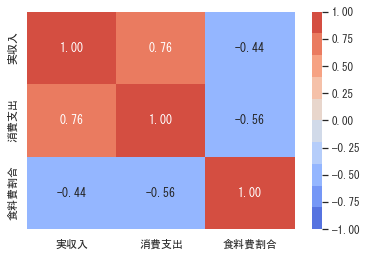

In [9]:
import seaborn as sns
import matplotlib as mpl
sns.set(font=['MS Gothic'])
sns.heatmap(df21.corr(),cmap=sns.color_palette('coolwarm',10),annot=True,fmt='.2f',vmin=-1,vmax=1)